In [1]:
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import re

import os

# how would you test histograms

try thease web pages:

http://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/

https://stats.stackexchange.com/questions/7400/how-to-assess-the-similarity-of-two-histograms

### Command line checks of the data.

In [2]:
!pwd

/vagrant/notebooks/EMA


In [3]:
!ls

A8565084_project_diary[EMA].ipynb      EMA_data
Cookbook_to_import_and_clean.ipynb     Q_1_immigration_and_ageProfile.ipynb
EMA_NB_for_first_question-Copy1.ipynb  Q_2_brexit_outcome_factors.ipynb
EMA_NB_for_first_question.ipynb


In [4]:
os.chdir("/vagrant/notebooks/EMA/EMA_data")

In [5]:
!pwd

/vagrant/notebooks/EMA/EMA_data


In [6]:
!ls

EU-referendum-result-data.csv  ukmye2015


In [7]:
os.chdir("/vagrant/notebooks/EMA/EMA_data/ukmye2015")

In [8]:
!ls

MYE1_population_summary_for_UK.xls
MYE2_population_by_sex_and_age_for_local_authorities_UK.xls
MYE3_population_change_for_local_authorities_UK.xls
MYE4_population_summary_for_UK_countries_7115.xls
MYE5_population_density_series_UK_(0115).xls
MYEB1_detailed_population_estimates_series_UK.csv
MYEB2_detailed_components_of_change_series_EW.csv
MYEB3-checkpoint1519.csv
MYEB3_summary_components_of_change_series_UK.csv
MYEB_information_note.pdf
[changed_number_ibreOffice]MYEB3_summary_components_of_change_series_UK.csv
[set_to_numeric]MYEB3_summary_components_of_change_series_UK-csv.csv


In [9]:
!file /vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv

/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv: ASCII text, with very long lines, with CRLF line terminators


In [10]:
!head -2 MYEB3_summary_components_of_change_series_UK.csv

# Recipe for import and clean data

# MYEB3
### Load age data into dataframe

In [11]:
# MYEB3_summary_components_of_change_series_UK.csv

# After some time juggling I've included the [,thousands=','] bit to the read_csv to remove ,'s indicating thousands.

change_components = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv', 
                        encoding = 'ASCII',thousands=',')

change_components[:2]

,lad2014_code,lad2014_name,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2015,natchange_2015,internal_in_2054,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,1102,-81,2137,2281,-144,248,135,113,15,92493
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,1488,465,6184,7071,-887,1250,450,800,12,139509


In [12]:
# What type of data types are contained?

change_components.dtypes
# Object type for the 2015 columns needs checking 

lad2014_code              object
lad2014_name              object
country                   object
population_2001            int64
births_2002                int64
deaths_2002                int64
natchange_2002             int64
internal_in_2002           int64
internal_out_2002          int64
internal_net_2002          int64
international_in_2002      int64
international_out_2002     int64
international_net_2002     int64
other_change_2002          int64
population_2002            int64
births_2003                int64
deaths_2003                int64
natchange_2003             int64
internal_in_2003           int64
internal_out_2003          int64
internal_net_2003          int64
international_in_2003      int64
international_out_2003     int64
international_net_2003     int64
other_change_2003          int64
population_2003            int64
births_2004                int64
deaths_2004                int64
natchange_2004             int64
internal_in_2004           int64
          

In [13]:
change_components['births_2015'][0:390]
change_components['deaths_2015'][30:360]

# Ahh some values (prob NULL) are a colon.....

30                    1560
31                    1458
32                    1876
33                    1222
34                    2368
35                     746
36                    1228
37                    1108
38                     810
39                    1283
40                    1190
41                    1773
42                    2122
43                    1768
44                    1839
45                    1764
46                    5562
47                    3871
48                    3357
49                    3271
50                    6126
51                      25
52                    4720
53                    1463
54                    2038
55                    3711
56                    1496
57                     817
58                     704
59                    1328
              ...         
330                      :
331                      :
332                      :
333                      :
334                      :
335                      :
3

In [14]:
# Remove the colons in the non-numeric columns2015 ...

to_remove_colon = ['births_2015', 'deaths_2015', 'natchange_2015', 'internal_in_2054', 'internal_out_2015', 
                   'internal_net_2015', 'international_in_2015', 'international_out_2015', 'international_net_2015', 
                   'other_change_2015', 'population_2015']


change_components.replace(r':', np.nan, inplace=True, regex=True )


pd.to_numeric(change_components[to_remove_colon], errors= 'coerce')
change_components['deaths_2015'][330:336]

# Well this seems to have worked :)))))))

330    NaN
331    NaN
332    NaN
333    NaN
334    NaN
335    NaN
Name: deaths_2015, dtype: object

In [15]:
# Explore the rows that had the blank values to see what information is lost 
pd.isnull(change_components).any(1).nonzero()[0]

array([326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336], dtype=int32)

In [16]:
# Here is the missing data
change_components.loc[[325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337]]

,lad2014_code,lad2014_name,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2015,natchange_2015,internal_in_2054,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
325,E09000033,Westminster,E,203329,2531,1372,1159,20051,18823,1228,...,1163,1522,17911,21184,-3273,16009,5246,10763,-5,242299
326,N09000001,Antrim and Newtownabbey,N,128760,1669,1016,653,4356,4269,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,N09000011,Ards and North Down,N,149559,1593,1409,184,4004,3325,679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,N09000002,"Armagh City, Banbridge and Craigavon",N,176014,2370,1395,975,3957,3300,657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,N09000003,Belfast,N,328695,3857,3324,533,10469,12157,-1688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,N09000004,Causeway Coast and Glens,N,131374,1616,1009,607,4136,3662,474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,N09000005,Derry City and Strabane,N,143810,2078,1033,1045,2635,2747,-112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,N09000006,Fermanagh and Omagh,N,105751,1340,899,441,3220,2507,713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,N09000007,Lisburn and Castlereagh,N,124585,1528,1092,436,4638,5062,-424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,N09000008,Mid and East Antrim,N,127452,1461,1151,310,3349,3013,336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
change_components[[ 'other_change_2002', 'other_change_2003', 'other_change_2004', 'other_change_2005', 
                   'other_change_2006', 'other_change_2007', 'other_change_2008', 'other_change_2009', 
                   'other_change_2010', 'other_change_2011', 'other_change_2012', 'other_change_2013', 
                   'other_change_2014', 'other_change_2015']].sum(axis=0).nlargest(20)



other_change_2003    22773
other_change_2006    20959
other_change_2007    19151
other_change_2008    18091
other_change_2002    17700
other_change_2005    17464
other_change_2009    15846
other_change_2004    15628
other_change_2010    10430
other_change_2011     6716
other_change_2013     5180
other_change_2014     5166
other_change_2012     -119
dtype: int64

# Now for the other csv's in the set.....MYEB2

In [18]:

age_change_components = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB2_detailed_components_of_change_series_EW.csv', 
            encoding = 'ASCII')

age_change_components[:10]

,lad2014_code,lad2014_name,country,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,...,other_adjust_2006,other_adjust_2007,other_adjust_2008,other_adjust_2009,other_adjust_2010,other_adjust_2011,other_adjust_2012,other_adjust_2013,other_adjust_2014,other_adjust_2015
0,E06000001,Hartlepool,E,1,0,525,502,516,553,531,...,0,0,0,0,0,0,0,0,0,0
1,E06000001,Hartlepool,E,1,1,544,526,498,526,550,...,0,0,0,0,0,0,0,0,0,0
2,E06000001,Hartlepool,E,1,2,548,548,551,507,521,...,0,0,0,0,0,0,0,0,0,0
3,E06000001,Hartlepool,E,1,3,556,546,548,553,508,...,0,0,0,0,0,0,0,0,0,0
4,E06000001,Hartlepool,E,1,4,606,549,553,540,554,...,0,0,0,0,0,0,0,0,0,0
5,E06000001,Hartlepool,E,1,5,606,609,557,558,536,...,0,0,0,0,0,0,0,0,0,0
6,E06000001,Hartlepool,E,1,6,651,619,613,561,559,...,0,0,0,0,0,0,0,0,0,0
7,E06000001,Hartlepool,E,1,7,665,655,626,618,555,...,0,0,0,0,0,0,0,0,0,0
8,E06000001,Hartlepool,E,1,8,615,670,650,625,626,...,0,0,0,0,0,0,0,0,0,0
9,E06000001,Hartlepool,E,1,9,681,609,675,653,623,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Make d type check...
age_change_components.dtypes

# Looks good! :) And as cast to int's looks like no/few NaN's

lad2014_code           object
lad2014_name           object
country                object
sex                     int64
age                     int64
population_2001         int64
population_2002         int64
population_2003         int64
population_2004         int64
population_2005         int64
population_2006         int64
population_2007         int64
population_2008         int64
population_2009         int64
population_2010         int64
population_2011         int64
population_2012         int64
population_2013         int64
population_2014         int64
population_2015         int64
births_2002             int64
births_2003             int64
births_2004             int64
births_2005             int64
births_2006             int64
births_2007             int64
births_2008             int64
births_2009             int64
births_2010             int64
births_2011             int64
                        ...  
special_change_2010     int64
special_change_2011     int64
special_ch

In [20]:

age_test = age_change_components.drop(['lad2014_code', 'lad2014_name', 'country'], axis=1, inplace= False)

age_test[~age_test.applymap(np.isreal).all(1)]


,sex,age,population_2001,population_2002,population_2003,population_2004,population_2005,population_2006,population_2007,population_2008,...,other_adjust_2006,other_adjust_2007,other_adjust_2008,other_adjust_2009,other_adjust_2010,other_adjust_2011,other_adjust_2012,other_adjust_2013,other_adjust_2014,other_adjust_2015


# MYEB2 checks on the values in the data...
# 1st) check "international_net_20??" is correct


In [21]:
check_in = [ 'international_in_2003', 'international_in_2004',  
            'international_in_2006', 'international_in_2007', 'international_in_2008', 'international_in_2009', 
            'international_in_2010', 'international_in_2011', 'international_in_2012', 'international_in_2013', 
            'international_in_2014', 'international_in_201']

check_out = ['international_out_2003',
             'international_out_2004', 'international_out_2006', 'international_out_2007',
             'international_out_2008', 'international_out_2009', 'international_out_2010', 'international_out_2011',
             'international_out_2012', 'international_out_2013', 'international_out_2014', 'international_out_2015',]

given_international = ['international_net_2002', 'international_net_2003', 'international_net_2004', 
                       'international_net_2006', 'international_net_2007', 'international_net_2008', 'international_net_2009',
                       'international_net_2010', 'international_net_2011', 'international_net_2012', 'international_net_2013', 
                       'international_net_2014', 'international_net_2015']

check_diff = [ 'check_diff_03', 'check_diff_04',  
              'check_diff_06', 'check_diff_07', 'check_diff_08', 'check_diff_09', 
              'check_diff_10', 'check_diff_11', 'check_diff_12', 'check_diff_13',
              'check_diff_14', 'check_diff_15']

# SPOT CHECK 2002
#age_change_components['check_diff_02'] = (age_change_components['international_in_2002'] + age_change_components['international_out_2002']) - age_change_components['international_net_2002']
#age_change_components['check_diff_02'].notnull()

# SPOT CHECK 2005
#age_change_components['check_diff_05'] = (age_change_components['international_in_2005'] + age_change_components['international_out_2005']) - age_change_components['international_net_2005']
#age_change_components['check_diff_05'].notnull()

# SPOT CHECK 2011
#age_change_components['check_diff_11'] = (age_change_components['international_in_2011'] + age_change_components['international_out_2011']) - age_change_components['international_net_2011']
#age_change_components['check_diff_11'].notnull()

# SPOT CHECK 2015
age_change_components['check_diff_15'] = (age_change_components['international_in_2015'] + age_change_components['international_out_2015']) - age_change_components['international_net_2015']
age_change_components['check_diff_15'].notnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
63306    True
63307    True
63308    True
63309    True
63310    True
63311    True
63312    True
63313    True
63314    True
63315    True
63316    True
63317    True
63318    True
63319    True
63320    True
63321    True
63322    True
63323    True
63324    True
63325    True
63326    True
63327    True
63328    True
63329    True
63330    True
63331    True
63332    True
63333    True
63334    True
63335    True
Name: check_diff_15, dtype: bool

In [22]:
list(age_change_components)

['lad2014_code',
 'lad2014_name',
 'country',
 'sex',
 'age',
 'population_2001',
 'population_2002',
 'population_2003',
 'population_2004',
 'population_2005',
 'population_2006',
 'population_2007',
 'population_2008',
 'population_2009',
 'population_2010',
 'population_2011',
 'population_2012',
 'population_2013',
 'population_2014',
 'population_2015',
 'births_2002',
 'births_2003',
 'births_2004',
 'births_2005',
 'births_2006',
 'births_2007',
 'births_2008',
 'births_2009',
 'births_2010',
 'births_2011',
 'births_2012',
 'births_2013',
 'births_2014',
 'births_2015',
 'deaths_2002',
 'deaths_2003',
 'deaths_2004',
 'deaths_2005',
 'deaths_2006',
 'deaths_2007',
 'deaths_2008',
 'deaths_2009',
 'deaths_2010',
 'deaths_2011',
 'deaths_2012',
 'deaths_2013',
 'deaths_2014',
 'deaths_2015',
 'internal_in_2002',
 'internal_in_2003',
 'internal_in_2004',
 'internal_in_2005',
 'internal_in_2006',
 'internal_in_2007',
 'internal_in_2008',
 'internal_in_2009',
 'internal_in_2010',
 

# Areas where de-anonimisation may occur?? births

In [23]:
birth_anonimisation = [ 'births_2002', 'births_2003', 'births_2004', 'births_2005', 'births_2006',
                        'births_2007', 'births_2008', 'births_2009', 'births_2010', 'births_2011',
                        'births_2012', 'births_2013', 'births_2014', 'births_2015']


#age_change_components.loc[(age_change_components['births_2002'] < 100) & (age_change_components['age'] == 0)]['births_2002']
#age_change_components.loc[(age_change_components['births_2003'] < 100) & (age_change_components['age'] == 0)]['births_2003']
#age_change_components.loc[(age_change_components['births_2004'] < 100) & (age_change_components['age'] == 0)]['births_2004']
#age_change_components.loc[(age_change_components['births_2005'] < 100) & (age_change_components['age'] == 0)]['births_2005']
#age_change_components.loc[(age_change_components['births_2006'] < 100) & (age_change_components['age'] == 0)]['births_2006']
#age_change_components.loc[(age_change_components['births_2007'] < 100) & (age_change_components['age'] == 0)]['births_2007']
#age_change_components.loc[(age_change_components['births_2008'] < 100) & (age_change_components['age'] == 0)]['births_2008']
#age_change_components.loc[(age_change_components['births_2009'] < 100) & (age_change_components['age'] == 0)]['births_2009']
#age_change_components.loc[(age_change_components['births_2010'] < 100) & (age_change_components['age'] == 0)]['births_2010']
#age_change_components.loc[(age_change_components['births_2011'] < 100) & (age_change_components['age'] == 0)]['births_2011']
#age_change_components.loc[(age_change_components['births_2012'] < 100) & (age_change_components['age'] == 0)]['births_2012']
#age_change_components.loc[(age_change_components['births_2013'] < 100) & (age_change_components['age'] == 0)]['births_2013']
#age_change_components.loc[(age_change_components['births_2014'] < 100) & (age_change_components['age'] == 0)]['births_2014']
age_change_components.loc[(age_change_components['births_2015'] < 100) & (age_change_components['age'] == 0)]['births_2015']




KeyError: MemoryError()

# How significant are the columns:

# "special_change_20?? "

# " unattrib_20??"

# "other_adjust_20?? "

In [ ]:
age_change_components[['special_change_2002', 'special_change_2003', 'special_change_2004', 'special_change_2005', 
                       'special_change_2006', 'special_change_2007', 'special_change_2008', 'special_change_2009', 
                       'special_change_2010', 'special_change_2011', 'special_change_2012', 'special_change_2013', 
                       'special_change_2014', 'unattrib_2002', 'unattrib_2003', 'unattrib_2004', 'unattrib_2005', 
                       'unattrib_2006', 'unattrib_2007', 'unattrib_2008', 'unattrib_2009', 'unattrib_2010', 
                       'unattrib_2011', 'other_adjust_2002', 'other_adjust_2003', 'other_adjust_2004', 
                       'other_adjust_2005', 'other_adjust_2006', 'other_adjust_2007', 'other_adjust_2008', 
                       'other_adjust_2009', 'other_adjust_2010', 'other_adjust_2011', 'other_adjust_2012', 
                       'other_adjust_2013', 'other_adjust_2014', 'other_adjust_2015']].sum(axis=0).nlargest(20)

In [ ]:
"""
age_change_components.groupby(['country'])[['special_change_2002', 'special_change_2003', 'special_change_2004', 'special_change_2005', 
                       'special_change_2006', 'special_change_2007', 'special_change_2008', 'special_change_2009', 
                       'special_change_2010', 'special_change_2011', 'special_change_2012', 'special_change_2013', 
                       'special_change_2014', 'unattrib_2002', 'unattrib_2003', 'unattrib_2004', 'unattrib_2005', 
                       'unattrib_2006', 'unattrib_2007', 'unattrib_2008', 'unattrib_2009', 'unattrib_2010', 
                       'unattrib_2011', 'other_adjust_2002', 'other_adjust_2003', 'other_adjust_2004', 
                       'other_adjust_2005', 'other_adjust_2006', 'other_adjust_2007', 'other_adjust_2008', 
                       'other_adjust_2009', 'other_adjust_2010', 'other_adjust_2011', 'other_adjust_2012', 
                       'other_adjust_2013', 'other_adjust_2014', 'other_adjust_2015']].sum()#.nlargest(20)
"""

# Report the largest value (3701) but essentialy insignificant

# and MYEB1

In [ ]:
# And the last one....

est_population = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB1_detailed_population_estimates_series_UK.csv', 
                             encoding = 'ASCII')
est_population[:2]
# Grrrrr warning about mixed data types, check column 19

In [ ]:
# Try a conversion to numeric values and then find any non numeric values.

est_population['population_2015'] = pd.to_numeric(est_population['population_2015'],errors = 'coerce')

#est_population['population_2015'][~est_population['population_2015'].notnull()]

len(est_population['population_2015'])#[:2]

In [ ]:
# To find the NaN rows so that they can be looked at.
# Explore the rows that had the blank values to see what information is lost 
to_check = pd.isnull(est_population).any(1).nonzero()[0]

In [ ]:
#est_population.loc[to_check]
est_population.loc[59331:61334]

In [ ]:
# Just exploring some of the non-numeric cells 
est_population.loc[59332:59342, :][:2]

# Maybe Northen Ireland haven't returned 2015 counts?

In [ ]:
est_population.groupby(['country']).mean()#['population_2015'].sum()

In [ ]:

# test[change_to_num] = pd.to_numeric(test[change_to_num] ,errors='coerce')

est_population['population_2015'] = pd.to_numeric(est_population['population_2015'],errors = 'coerce')
#est_population['population_2015'].dtype

est_population['population_2015'][~est_population['population_2015'].notnull()]


In [ ]:
est_population.dtypes

In [ ]:
# The data is not formated correctly....object suggest strings so test for numeric values

# This cell is to check that the values are numbers and returns count of rows that are not numeric
#change_components.set_index('lad2014_name', inplace=True)
test = change_components.drop(['lad2014_code', 'lad2014_name', 'country'], axis=1, inplace= False)

test[~test.applymap(np.isreal).all(1)]

# Looks like the majority(or all) rows that I need are not numeric values.

# move the cell below when i think it's worked

In [ ]:
change_components.loc[325:338,'births_2015':'population_2015']

# below has not worked

# need this cell and one below to clean but need to explain how i know about :'s

In [ ]:


change_to_num = ['population_2001', 'births_2002', 'deaths_2002', 'natchange_2002', 'internal_in_2002', 
          'internal_out_2002', 'internal_net_2002', 'international_in_2002', 'international_out_2002', 
          'international_net_2002', 'other_change_2002', 'population_2002', 'births_2003', 
          'deaths_2003', 'natchange_2003', 'internal_in_2003', 'internal_out_2003', 'internal_net_2003', 
          'international_in_2003', 'international_out_2003', 'international_net_2003', 'other_change_2003',
          'population_2003', 'births_2004', 'deaths_2004', 'natchange_2004', 'internal_in_2004', 
          'internal_out_2004', 'internal_net_2004', 'international_in_2004', 'international_out_2004', 
          'international_net_2004', 'other_change_2004', 'population_2004', 'births_2005', 'deaths_2005',
           'natchange_2005', 'internal_in_2005', 'internal_out_2005', 'internal_net_2005', 
          'international_in_2005', 'international_out_2005', 'international_net_2005', 
          'other_change_2005', 'population_2005', 'births_2006', 'deaths_2006', 'natchange_2006',
           'internal_in_2006', 'internal_out_2006', 'internal_net_2006', 'international_in_2006',
           'international_out_2006', 'international_net_2006', 'other_change_2006', 'population_2006',
           'births_2007', 'deaths_2007', 'natchange_2007', 'internal_in_2007', 'internal_out_2007',
           'internal_net_2007', 'international_in_2007', 'international_out_2007', 'international_net_2007',
           'other_change_2007', 'population_2007', 'births_2008', 'deaths_2008', 'natchange_2008',
           'internal_in_2008', 'internal_out_2008', 'internal_net_2008', 'international_in_2008', 
          'international_out_2008', 'international_net_2008', 'other_change_2008', 'population_2008', 
          'births_2009', 'deaths_2009', 'natchange_2009', 'internal_in_2009', 'internal_out_2009', 
          'internal_net_2009', 'international_in_2009', 'international_out_2009', 
          'international_net_2009', 'other_change_2009', 'population_2009', 'births_2010', 'deaths_2010',
          'natchange_2010', 'internal_in_2010', 'internal_out_2010', 'internal_net_2010', 
          'international_in_2010', 'international_out_2010', 'international_net_2010', 
          'other_change_2010', 'population_2010', 'births_2011', 'deaths_2011', 'natchange_2011', 
          'internal_in_2011', 'internal_out_2011', 'internal_net_2011', 'international_in_2011',
           'international_out_2011', 'international_net_2011', 'other_change_2011', 'population_2011', 
          'births_2012', 'deaths_2012', 'natchange_2012', 'internal_in_2012', 'internal_out_2012', 
          'internal_net_2012', 'international_in_2012', 'international_out_2012', 'international_net_2012',
          'other_change_2012', 'population_2012', 'births_2013', 'deaths_2013', 'natchange_2013', 
          'internal_in_2013', 'internal_out_2013', 'internal_net_2013', 'international_in_2013', 
          'international_out_2013', 'international_net_2013', 'other_change_2013', 'population_2013', 
          'births_2014', 'deaths_2014', 'natchange_2014', 'internal_in_2014', 'internal_out_2014', 
          'internal_net_2014', 'international_in_2014', 'international_out_2014', 'international_net_2014', 
          'other_change_2014', 'population_2014', 'births_2015', 'deaths_2015', 'natchange_2015', 
          'internal_in_2054', 'internal_out_2015', 'internal_net_2015', 'international_in_2015', 
          'international_out_2015', 'international_net_2015', 'other_change_2015', 'population_2015']


In [ ]:
# test.apply(pd.to_numeric(test, errors= 'coerce'))

test[change_to_num] = pd.to_numeric(test[change_to_num] ,errors='coerce')

test[~test.applymap(np.isreal).all(1)]

In [ ]:
change_components.dtypes

In [ ]:


change_components.columns.str.replace(',','')
#cause_of_change.columns.str.replace(':','')
change_components.replace(r':', np.nan, inplace=True, regex=True )


pd.to_numeric(change_components[change_to_num], errors= 'coerce')

In [ ]:
test = change_components.drop(['lad2014_code', 'lad2014_name', 'country'], axis=1, inplace= False)

test[~test.applymap(np.isreal).all(1)]

In [ ]:
test[change_to_num] = test[change_to_num].apply(pd.to_numeric)
test

In [ ]:
change_components.applymap(lambda x: isinstance(x, (int,float)))

In [ ]:
# CHECK IF COERCE HAS CHANGED THE ":" TO NaN's.....
change_components.loc[325:338,'births_2015':'population_2015']

In [ ]:
change_components.dtypes

In [ ]:
##

test = change_components.drop(['lad2014_code', 'lad2014_name', 'country'], axis=1, inplace= False)

len(test[~test.applymap(np.isreal).all(1)])#[:2]

In [ ]:
test['births_2002'][29:360]
# some columns have comma's.....remove from the data



In [ ]:
test.columns.str.replace(',','')
#cause_of_change.columns.str.replace(':','')
#change_components.replace(r':', np.nan, inplace=True, regex=True )


pd.to_numeric(test[change_to_num], errors= 'coerce')

In [ ]:
len(test[~test.applymap(np.isreal).all(1)])#[:2]

### Check the area code from the brexit data set matches the "lad2014_code"

### The "lad2014_code" and "Area" code for Brexit could be a great place to join data!

# Check and load population information into dataframe

In [ ]:
!file /vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv

In [ ]:
!head -1 MYEB3_summary_components_of_change_series_UK.csv

In [ ]:
# Head command out put looks odd.....

census_migration_df = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv', 
                        encoding = 'ASCII')
census_migration_df[:5].T

In [ ]:
list(census_migration_df)

In [ ]:
#census_migration_df.isnull().values.any()

# Think what the questions are????

[for population data] how if at all has immigration changed the age profile of areas/regions of the UK between 02 & 15?

so I need to:

work out how I'm going to profile the age in the first place!
+ summary stats/boxplot  ## less detail##
+ histogram   ## more detail##
+ scatter plot   ## more detail##
    x = bins of age groups 0-4, 5-9, 10-14, ...
    y = counts of population [may need to be standardised]

Make the comparasons for both region and area. and report are areas with high immigration showing higher increace in population change? e.g. Is there a correlation between areas of high migration and an increase in the proportion of working age population and children[assuming that polish agricultural workers will be having families in the east]

What is immigration like in Cornwall? How has the age profile of Cornwall changed in time period?

# What the different data sets are...

### MYE1_population_summary_for_UK.xls ~~

Break down of age{0-4, 5-9, 10-14,...} for UK, GB, England and wales, England, Wales, Scotland and Northen Ireland.

### MYE2_population_by_sex_and_age_for_local_authorities_UK.xls ~~

Population counts for each voting area/district, Region of UK, part of UK. All broken down by Male, Female and combined and given for ages 0-90 (in 1 year increments).  

### MYE3_population_change_for_local_authorities_UK.xls ~~

Population change counts for each voting area/district, Region of UK, part of UK. Broken down as components of change e.g. Births, Deaths, Internal migration inflow, Internal migration outflow, etc....




### MYE4_population_summary_for_UK_countries_(7115).xls

Population changes annual from mid 1971 to mid 2015. Broken down as UK, GB, England and Wales, England, Wales, Scotland and Northen Ireland


### MYE5_population_density_series_UK_(0115).xls

Population counts and "People per sq km" for each voting area/district, Region of UK, part of UK. For year by year from 2001 to 2015



### MYEB1_detailed_population_estimates_series_UK.csv

Population counts for each voting area/district. Broken down by Male, Female and combined and given for ages 0-90 (in 1 year increments). Covers time from 2001 to 2015

### MYEB2_detailed_components_of_change_series_EW.csv

Population change counts for each voting area/district, Region of UK, part of UK. Broken down by Male, Female and combined and given for ages 0-90 (in 1 year increments). Info given on Births, Deaths, Internal migration inflow, Internal migration outflow, etc.... Covers period 2002 to 2015.

### MYEB3_summary_components_of_change_series_UK.csv

Components of change broken down to area/district level. from 2001 to 2015


### MYEB_information_note.pdf







In [ ]:
test_size_df = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB2_detailed_components_of_change_series_EW.csv', 
                        encoding = 'ASCII')
test_size_df[:2]

In [ ]:
census_age_df = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB1_detailed_population_estimates_series_UK.csv', 
                        encoding = 'ASCII')
census_age_df[:5].T

In [ ]:
# Gust make df to look at changes in population over 15 years by constituants of UK

# THIS NOT WORKED ON START UP~~~~ BECAUSE THE RELEVANT CODE IS BELOW


national_changes = census_age_df.groupby(['country']).sum()
national_changes = national_changes.drop(['sex', 'Age'], axis = 1)

national_changes.T 

In [ ]:
national_changes.ix['E'].plot()
national_changes.ix['N'].plot()
national_changes.ix['S'].plot()
national_changes.ix['W'].plot(rot=90, figsize=(9.5,5), grid=True)

In [ ]:
summary_df = pd.read_excel( '/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYE4_population_summary_for_UK_countries_7115.xls', 
                           sheetname='Summary UK and countries', skiprows = 2, skip_footer = 286)

summary_df.drop(['Code'],inplace=True, axis=1)

summary_df
#summary_df

# Importing the xls file to extract the region data/key

In [ ]:
region_key = pd.read_excel("/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYE3_population_change_for_local_authorities_UK.xls",
                           sheetname="Components of Change", skiprows=6, parse_cols=1)
region_key['region_code'] = region_key['E92000001']
region_key['lad2014_name'] = region_key['ENGLAND']

#region_key.drop(['E92000001'], axis=1, inplace= True)
region_key.drop(['ENGLAND', 'E92000001'], axis=1, inplace= True)
region_key

In [ ]:
MYEB3 = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/ukmye2015/MYEB3_summary_components_of_change_series_UK.csv', 
                        encoding = 'ASCII',thousands=',', usecols=['lad2014_code', 'lad2014_name', 'country'])

MYEB3['Region'] = ''

list(MYEB3)


In [ ]:
MYEB3['Region'][:2]

In [ ]:
# Merge them
# suffixes=('_CC', '_VR') are used to find duplicates
# 

find_region_key = pd.merge(region_key, MYEB3, on='lad2014_name', how='outer', suffixes=('_CC', '_VR'))

#find_region_key = pd.merge(find_region_key, VR_key ,on='lad2014_name', how='outer', suffixes=('_CC', '_VR'))
# df[df['first_name'].notnull() & (df['nationality'] == "USA")]

find_region_key[:2]#['region_code']#.dtype#[find_region_key['country'].isnull()]


# Try a different approach ~ make a function to edit then apply()

# Only needs to be England as only split to regions

In [ ]:
find_region_key['region_code'] = find_region_key['region_code'].astype(str)
h = ''
j = ''

for index, row in find_region_key.iterrows():
    h = row.region_code
    if h == 'E12000001':
        print(h)


In [ ]:
# ##### GOT THIS MAKING CHANGES 

# BUT WANT TO LEAVE OTHERS ALONE

the_region = ''

find_region_key['Region'].astype(str)
find_region_key['region_code'].astype(str)

for index, row in find_region_key.iterrows():
    if re.search('^E', row.region_code):

    ##matchEngland = re.search('^E', row.region_code)
    ##if matchEngland:
        matchObject = re.search('^E12', row.region_code)
        if matchObject:
            the_region = row.region_code
        else:
            pass
        row.Region = the_region
    else:
        row.Region = ''

find_region_key[:15]

In [ ]:
# ##### GOT THIS MAKING CHANGES 

the_region = ''#''''E12000001'

find_region_key['Region'].astype(str)
find_region_key['region_code'].astype(str)

for index, row in find_region_key.iterrows():
    #h = row.region_code
    matchEngland = re.search('^E', row.region_code)
    if matchEngland:
        matchObject = re.search('^E12', row.region_code)
        if matchObject:
            the_region = row.region_code
        else:
            pass
        row.Region = the_region
    else:
        pass

find_region_key

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

# HERE HERE HERE

In [ ]:
VR_key = pd.read_csv('/vagrant/notebooks/EMA/EMA_data/EU-referendum-result-data.csv', 
                             encoding = 'ASCII', usecols=['Area','Region_Code'])


VR_key['lad2014_name'] = VR_key['Area']
VR_key['VR_lad2014_name'] = VR_key['Area']
VR_key['VR_Area'] = VR_key['Area']
VR_key['VR_Region_Code'] = VR_key['Region_Code']

VR_key.drop(['Region_Code','Area'], axis=1, inplace= True)



VR_key[:2]#.T

In [ ]:
#if region_key['region_code'].str[:1] == 'N':
#    region_key['Region'] = 'N92000002'
    
region_key['region_code'].str[:1] == 'N' region_key['Region'] = 'N92000002'

In [ ]:
# Merge them
# suffixes=('_CC', '_VR') are used to find duplicates
# 

find_region_key = pd.merge(region_key, MYEB3, on='lad2014_name', how='outer', suffixes=('_CC', '_VR'))
# df[df['first_name'].notnull() & (df['nationality'] == "USA")]

find_region_key[find_region_key['country'].isnull()]

In [ ]:
#df = pd.DataFrame([['BULL APPLE X5',''],['BEAR APPLE X5',''],['BULL APPLE X5','']], columns=['A','B'])

#find_region_key['Region'] = df['region_code'].map(lambda x: 'N92000002' if region_key[['region_code']].str[:1] == 'N')

find_region_key['Region'][find_region_key['region_code'].str[:1]=='N'] = 'N92000002'

# An atempt at saving a dataframe as txt/spreadsheet

In [ ]:
# Ha, export as and excel compatable sheet [the top one] + the web link
# http://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file

np.savetxt(r'/vagrant/notebooks/EMA/EMA_data/np.txt', summary.values, fmt='%d')

summary.to_csv(r'/vagrant/notebooks/EMA/EMA_data/summary.csv', header=None, index=None, sep=' ', mode='a')

#G:\TM351[dataManagementAndAnalysis]\ALL_EMA\WORK_ON_EMA

# To find colours for plotting!

In [ ]:
# To find colours for plotting

for name, hex in mpl.colors.cnames.items():
    print(name, hex)

# To see the colours and labels

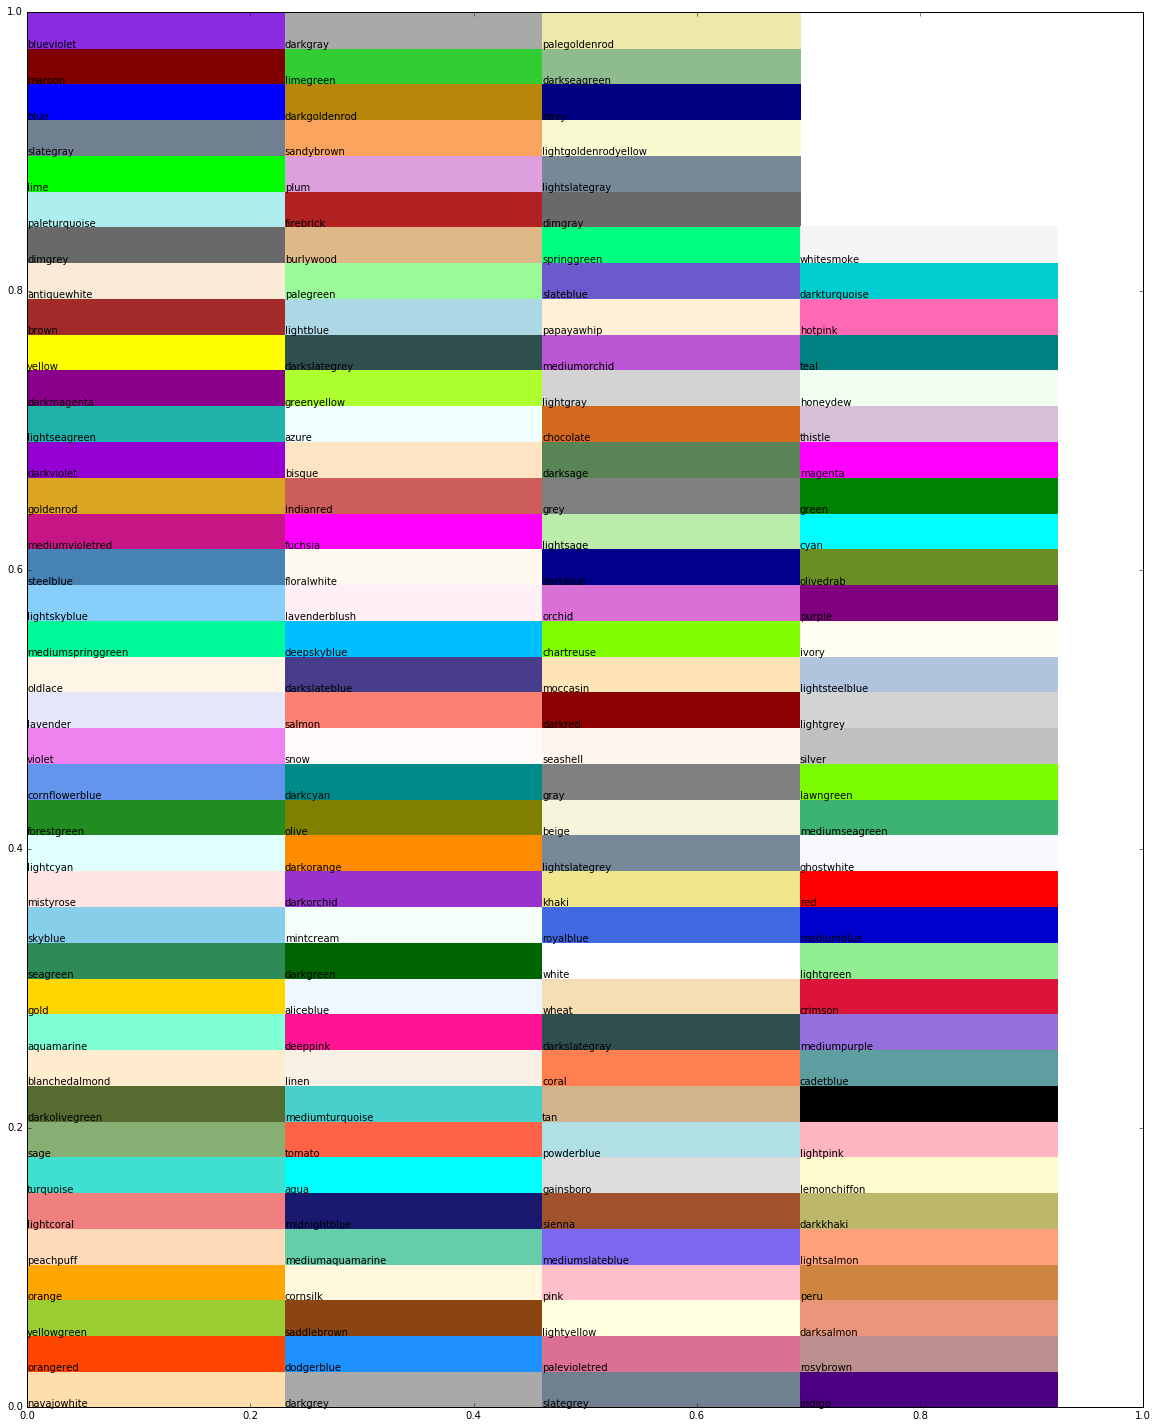

In [3]:
import matplotlib.patches as patches
import matplotlib.colors as colors
import math


fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)

ratio = 1.0 / 3.0
count = math.ceil(math.sqrt(len(colors.cnames)))
x_count = count * ratio
y_count = count / ratio
x = 0
y = 0
w = 1 / x_count
h = 1 / y_count

for c in colors.cnames:
    pos = (x / x_count, y / y_count)
    ax.add_patch(patches.Rectangle(pos, w, h, color=c))
    ax.annotate(c, xy=pos)
    if y >= y_count-1:
        x += 1
        y = 0
    else:
        y += 1

plt.show()

# plotting multi plots on the same figure

In [ ]:
# c1.31 DUPLICATE

# nrows = number of rows, ncols= number of columns, squeeze= something about flattening out the numpy return...
fig, axes = plt.subplots(nrows=3, ncols=1,squeeze=False)

age_change_components.groupby(['Segments'
                              ]).sum().plot.bar(y= ['population_2002', 
                                                    'population_2015'
                                                   ],
                                                figsize=(10,15),
                                                fontsize=10,
                                                ax=axes[0,0]
                                                # Guessing line below says where in the plot (+ title)
                                               ); axes[0,0].set_title('Population change 2002-15 combined for England and Wales')


########################################################################################################
age_change_components[age_change_components['country'
                                           ] == 'E'].groupby(['Segments'
                                                             ]).sum().plot.bar(y= ['population_2002', 
                                                                                   'population_2015'
                                                                                  ],
                                                                               legend= False,
                                                                               figsize=(10,15),
                                                                              # Guessing line below says where in the plot (+ title)
                                                                               ax=axes[1,0]); axes[1,0].set_title('England')


############################################################################################################

age_change_components[age_change_components['country'
                                           ] == 'W'].groupby(['Segments'
                                                             ]).sum().plot.bar(y= ['population_2002', 
                                                                                   'population_2015'
                                                                                  ],
                                                                               legend= False,
                                                                               figsize=(10,15),
                                                                               # Guessing line below says where in the plot (+ title)
                                                                               ax=axes[2,0]); axes[2,0].set_title('Wales')

################################################################################################################


plt.show()

In [ ]:
linewidth=50, linestyle="-", c="blue"

# check a numeric column that might be contaminated with strings

In [ ]:
# Check a numeric column that might be contaminated with strings
change_components['2015 people per sq. km'].apply(lambda x: isinstance(x, (int, float))).unique()

# Make a correlation matrix

In [ ]:
# Make a correlation matrix
combined_df[['Pct_Leave','pct_deaths']].corr(method='pearson')

# Unique values in a column as a list

In [ ]:
# Unique values in a column as a list
change_components['Region'].unique()

# CHECK # NaN's IN A COLUMN

In [ ]:
# CHECK # NaN's IN A COLUMN
change_components[['2015 people per sq. km']].isnull().sum()

# Find the row/index numbers of given columns names containing nulls 

In [ ]:
# FIND THE ROW NUMBERS OF THE NaN's BECAUSE I CAN'T GET THIS TO DROP THEM WITH .dropna()
change_components[['Pct_immigration_02_15',
                   'Pct_death_02_15',
                   'Pct_total_births_02_15',
                   'normalize*100']][pd.isnull(change_components).any(axis=1)]

# To get rid of non numeric values

In [ ]:
# HAD TO DROP NaN's OUT!
change_components['normalize*100'] = pd.notnull(change_components['normalize*100'])
change_components['normalize*100'].isnull().sum()#.dropna()
#change_components['normalize*100', 'To_leave'].dropna(inplace=True)

In [ ]:
# Need to list this...

In [ ]:
# Need to list this
change_components.loc[change_components['country'] == 'E', 'Pct_immigration_02_15':'Pct_immigration_02_15'].mean()

# Drop bygiving list of index numbers

In [ ]:
#df.drop(df.index[[1,3]])
change_components.drop(change_components.index[[369,379]], inplace= True)

# Normalise function
I think that using a lambda is better...

In [ ]:
#Normalise function
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
# USING A LAMBDA AND APPLYING
normalize = (lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

test_density['density_normalize_2015'] = change_components[['2015 people per sq. km']].apply(normalize)


test_density[:5]

# Select rows on column boolean

In [ ]:
change_components[change_components['lad2014_name'] == 'Northern Ireland']


how would you test histograms
try thease web pages:
http://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/
https://stats.stackexchange.com/questions/7400/how-to-assess-the-similarity-of-two-histograms

#example _from scikit website:

# How to plot a grouping using kNN. looks quite good. Perhaps this could be run for the last few perameter selections

# NEED TO PARK THIS AS GETTING MEMORY ERROR. SAVED IN COOKBOOK NB

In [ ]:
%matplotlib inline

In [ ]:
"""print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
"""

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# DON'T THINK I NEED THIS
#n_neighbors = 15

# import some data to play with
########## USE THIS DATA FROM ABOVE!
PLOT_train = change_components[['Pct_immigration_02_15', 'Pct_total_births_02_15']] # wAS x
PLOT_targe = change_components['To_leave'] # Was Y


##################################################THIS IS WHERE I WAS UPTO 
##################################################KEPT GETTING MEMORY ERROR SO TRIED TO HALF N OF DATA VALUES
# HAVING MEMORY ERROR SO SELECT A HALF SAMPLE

PLOT_train = PLOT_train.sample(frac=0.5)

PLOT_targe = PLOT_targe.sample(frac=0.5)





# TURN TO FLOATS DONT THINK I NEED THIS
#PLOT_train = pd.to_numeric(PLOT_train[['Pct_immigration_02_15', 'Pct_total_births_02_15']], errors='coerce').fillna(0)


##################### TO PUT THE COLOURS BEHIND THE PLOT
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    classifier = neighbors.KNeighborsClassifier(n_neighbors=30, metric='euclidean', weights='distance')
    classifier.fit(PLOT_train, PLOT_targe)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = PLOT_train['Pct_immigration_02_15'].min() - 1, PLOT_train['Pct_immigration_02_15'].max() + 1
    y_min, y_max = PLOT_train['Pct_total_births_02_15'].min() - 1, PLOT_train['Pct_total_births_02_15'].max() + 1
    
    # 'Pct_immigration_02_15', 'Pct_total_births_02_15'
    ##################
    #   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #   y_min, y_max = X[:, 1].min() - 1, X[:, 1]
    ###################
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(PLOT_train, PLOT_train, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
# THINGS CHANGED
### clf = classifier
###

# USING COLOUR_MAP FOR .PLOT()

In [ ]:
# USING COLOUR_MAP FOR .PLOT()____SEE COLOURMAPS ON LINK BELOW
# http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
df.plot(kind='bar', stacked=True, colormap='Paired')